In [3]:
%run train.py

Starting training test3


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 13.76it/s]


--- Validation results --- DICE: 0.047147, MSE: 0.310769, KL 4.267787


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 13.66it/s]


--- Validation results --- DICE: 0.053152, MSE: 0.305212, KL 3.077773


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 14.96it/s]


--- Validation results --- DICE: 0.059662, MSE: 0.305564, KL 2.503380


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 15.14it/s]


--- Validation results --- DICE: 0.067550, MSE: 0.306597, KL 2.179880


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 13.67it/s]


--- Validation results --- DICE: 0.078523, MSE: 0.307169, KL 1.855487


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 14.12it/s]


--- Validation results --- DICE: 0.092823, MSE: 0.304668, KL 1.638622


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 14.51it/s]


--- Validation results --- DICE: 0.112976, MSE: 0.303679, KL 1.454803


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 13.73it/s]


--- Validation results --- DICE: 0.139173, MSE: 0.305744, KL 1.325796


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 14.86it/s]


--- Validation results --- DICE: 0.171294, MSE: 0.304835, KL 1.182087


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 14.42it/s]


--- Validation results --- DICE: 0.203391, MSE: 0.303914, KL 1.079732


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 14.86it/s]


--- Validation results --- DICE: 0.226572, MSE: 0.304799, KL 1.008539


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 14.55it/s]


--- Validation results --- DICE: 0.243913, MSE: 0.306551, KL 0.930061


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 15.04it/s]


--- Validation results --- DICE: 0.253232, MSE: 0.307630, KL 0.869429


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 14.49it/s]


--- Validation results --- DICE: 0.263601, MSE: 0.304367, KL 0.810441


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 14.69it/s]


--- Validation results --- DICE: 0.270032, MSE: 0.305546, KL 0.768662


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 15.32it/s]


--- Validation results --- DICE: 0.279210, MSE: 0.302950, KL 0.709888


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 13.60it/s]


--- Validation results --- DICE: 0.287443, MSE: 0.306642, KL 0.674548


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 14.51it/s]


--- Validation results --- DICE: 0.293188, MSE: 0.306677, KL 0.653373


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 15.13it/s]


--- Validation results --- DICE: 0.302260, MSE: 0.304442, KL 0.614495


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 14.55it/s]


--- Validation results --- DICE: 0.309581, MSE: 0.304899, KL 0.584412


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 15.21it/s]


--- Validation results --- DICE: 0.320227, MSE: 0.303130, KL 0.559253


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 14.74it/s]


--- Validation results --- DICE: 0.334356, MSE: 0.303415, KL 0.526562


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 14.85it/s]


--- Validation results --- DICE: 0.346469, MSE: 0.304570, KL 0.503129


[Validation]: 100%|██████████| 2/2 [00:00<00:00, 14.15it/s]


--- Validation results --- DICE: 0.354035, MSE: 0.303806, KL 0.483199


Epoch 25/100 [Training]:  28%|██▊       | 5/18 [00:00<00:01, 12.00it/s, loss=1.74]


KeyboardInterrupt: 

In [3]:
import sys
from tqdm import tqdm
from src.data_preparation import *
from src.network import *
from src.criterion import *
from src.testing_functions import *
from torch.optim.lr_scheduler import LambdaLR
from pathlib import Path
import pickle

#=========== SETUP PARAMETERS ===============

label = "test3"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_path = '../BRATS20/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/'
results_path = Path('training_results')/label
results_path.mkdir(parents=True, exist_ok=True)

checkpoint_path = results_path/"checkpoint.pth.tar"
checkpoint = torch.load(checkpoint_path)
with open(results_path/'params.pkl', 'rb') as f:
        params = pickle.load(f)

#=========== SETUP DATASETS AND DATA LOADERS ===============

dataset = BRATS_dataset(data_path, device, params)
test_loader = DataLoader(train_dataset, batch_size=params.batch_size, shuffle=True)

#=========== SETUP MODEL ===============

if params.VAE:
    model = VAE_UNET(params.num_slices, input_dim=dataset.input_dim, HR_dim=dataset.output_dim)
else:
    model = UNET(params.num_slices)
    

model.load_state_dict(checkpoint['model_state_dict'])
model = model.to(device)


Plotting results------------------------------------------------------------


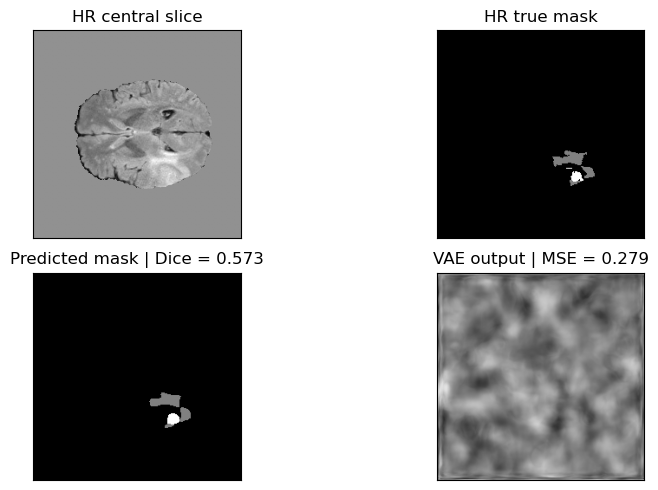

In [4]:

slices = [0]
plot_examples(model, train_dataset, slices, results_path, params.VAE)
